# The Validity of Zipf's Law in Shakespeare's Times and Today
#### In this exercise we are going to test if Zipf's law holds true for both a corpus of Shakespeare's writing and one containing contemporary spoken English from TV episodes ranging from 1950 to today. 

In [4]:
! pip install matplotlib
import matplotlib.pyplot as plt
import os
import string

#### First, we need to access the corpora and normalize the tokens

In [5]:
corpus_path = "../exercise-5/corpus/"
file_paths = [os.path.join(corpus_path, f) for f in os.listdir(corpus_path) if os.path.isfile(os.path.join(corpus_path, f))]

norm_tokens_shakespeare = []
for path in file_paths:
    with open(path, "r", encoding="utf-8") as f:
        tokens = f.read().split()
        norm_tokens_shakespeare.extend([token.lower().strip().strip(string.punctuation) for token in tokens])
        while '' in norm_tokens_shakespeare:
            norm_tokens_shakespeare.remove('')
            
print("Number of tokens in Shakespeare's works: ", len(norm_tokens_shakespeare))

Number of tokens in Shakespeare's works:  961102


In [7]:
norm_tokens_contemp_ = []
norm_tokens_contemp = []
with open("corpus/tv_text.txt", encoding="UTF-8") as f:
    tokens = f.read().split()
    norm_tokens_contemp_.extend([token.lower().strip().strip(string.punctuation) for token in tokens])
    for token in norm_tokens_contemp_:
        if len(token) != 0:
            norm_tokens_contemp.append(token)       
            
print("Number of tokens in the contemporary corpus: ", len(norm_tokens_contemp))

Number of tokens in the contemporary corpus:  2118742


#### Next, we sort the tokens by number of occurences and calculate the frequencies

In [8]:
counts_shakespeare = {}
for token in norm_tokens_shakespeare:
    counts_shakespeare[token] = counts_shakespeare.get(token, 0) + 1
sorted_frequencies_shakespeare = sorted(counts_shakespeare.items(), key=lambda item: item[1], reverse=True)

counts_contemp = {}
for token in norm_tokens_contemp:
    counts_contemp[token] = counts_contemp.get(token, 0) + 1
sorted_frequencies_contemp = sorted(counts_contemp.items(), key=lambda item: item[1], reverse=True)


In [9]:
sum_tokens = 0
for item in sorted_frequencies_shakespeare:
    sum_tokens = sum_tokens + item[1]
    
words_shakespeare = []
frequencies_shakespeare = []
for item in sorted_frequencies_shakespeare[:100]:
    words_shakespeare.append(item[0])
    frequency = item[1]/sum_tokens
    frequencies_shakespeare.append(frequency)
    
sum_tokens = 0
for item in sorted_frequencies_contemp:
    sum_tokens = sum_tokens + item[1]
    
words_contemp = []
frequencies_contemp = []
for item in sorted_frequencies_contemp[:100]:
    words_contemp.append(item[0])
    frequency = item[1]/sum_tokens
    frequencies_contemp.append(frequency)

#### Finally, we calculate the frequencies according to Zipf's Law and create plots 

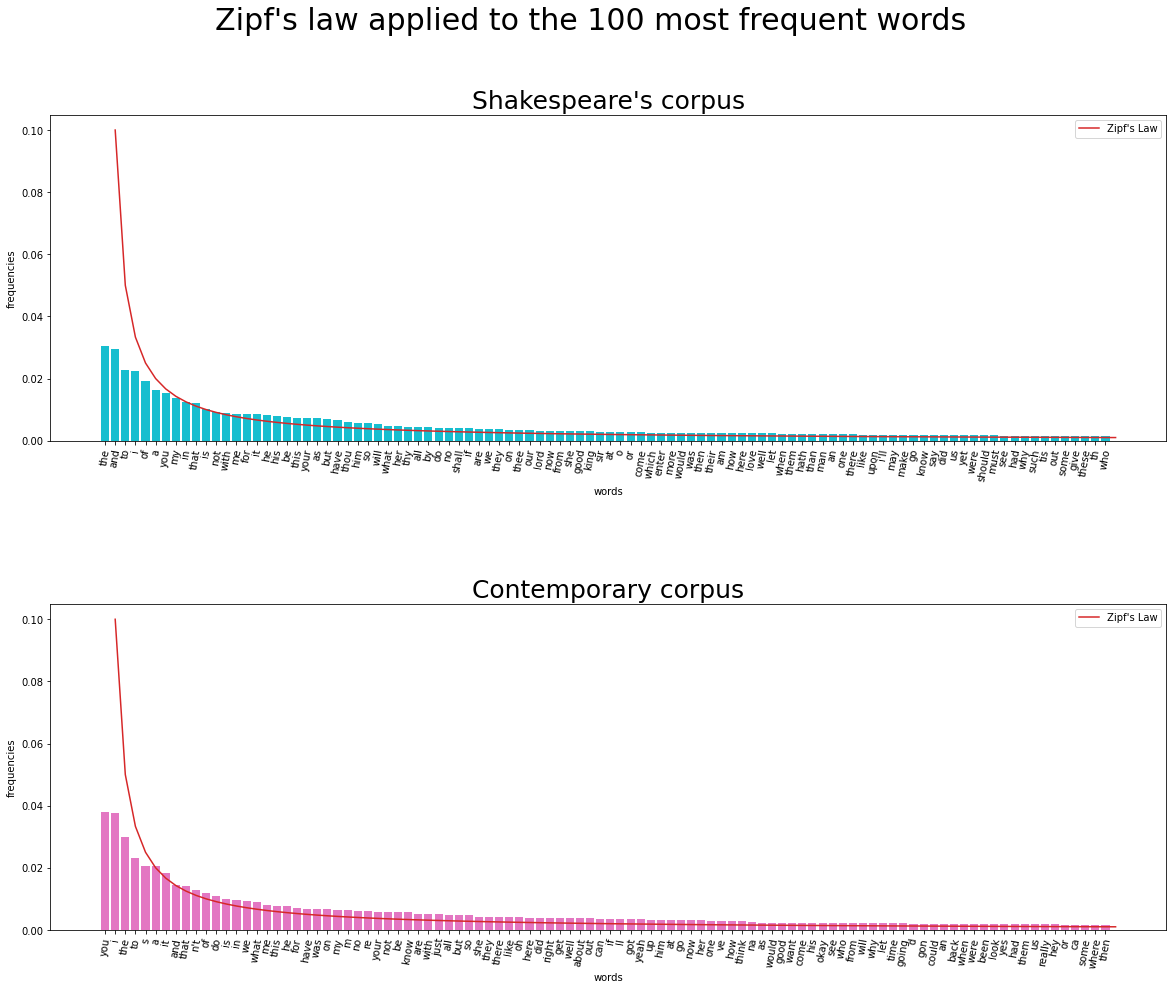

In [10]:
ranks = range(1,101)
probability_zipf = [0.1/rank for rank in ranks]

figure, ax = plt.subplots(2, 1, figsize=(20,15))
figure.suptitle("Zipf's law applied to the 100 most frequent words", fontsize=30)
plt.subplots_adjust(hspace=0.5)

ax[0].set_title("Shakespeare's corpus", fontsize=25)
ax[0].bar(words_shakespeare, frequencies_shakespeare, color="tab:cyan")
ax[0].plot(ranks, probability_zipf, color="tab:red", label="Zipf's Law")

ax[0].tick_params(axis="x", labelrotation=80)
ax[0].legend(loc='upper right')
ax[0].set(xlabel="words", ylabel="frequencies")

ax[1].set_title("Contemporary corpus", fontsize=25)
ax[1].bar(words_contemp, frequencies_contemp, color="tab:pink")
ax[1].plot(ranks, probability_zipf, color="tab:red", label="Zipf's Law")

ax[1].tick_params(axis="x", labelrotation=80)
ax[1].legend(loc='upper right')
ax[1].set(xlabel="words", ylabel="frequencies")

plt.show()

#### To show the results more clearly, below the frequencies are plotted on a logarithmic scale. 

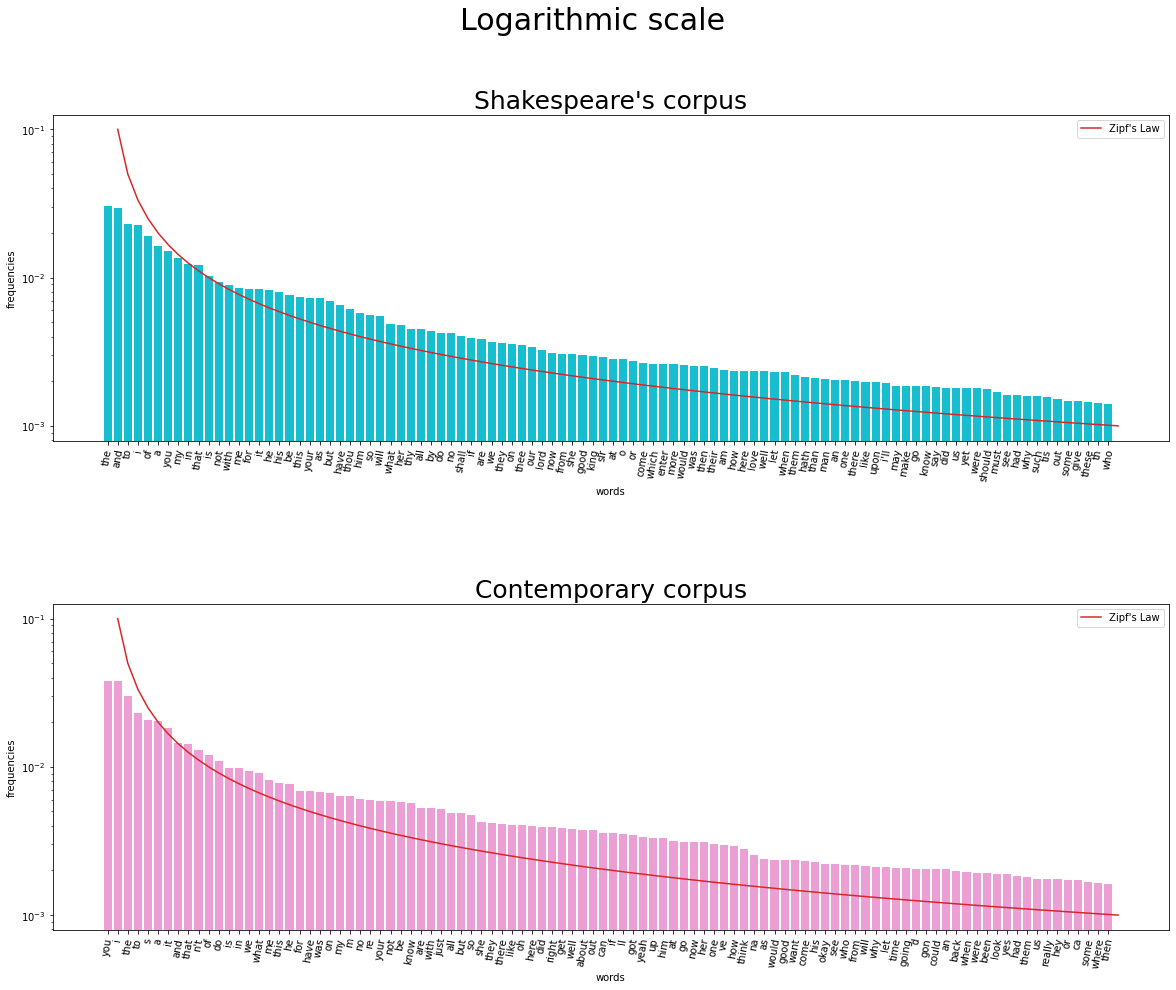

In [11]:
ranks = range(1,101)
probability_zipf = [0.1/rank for rank in ranks]

figure, ax = plt.subplots(2, 1, figsize=(20,15))
figure.suptitle("Logarithmic scale", fontsize=30)
plt.subplots_adjust(hspace=0.5)

ax[0].set_title("Shakespeare's corpus", fontsize=25)
ax[0].bar(words_shakespeare, frequencies_shakespeare, color="tab:cyan")
ax[0].plot(ranks, probability_zipf, color="tab:red", label="Zipf's Law")

ax[0].tick_params(axis="x", labelrotation=80)
ax[0].legend(loc='upper right')
ax[0].set(xlabel="words", ylabel="frequencies")

ax[1].set_title("Contemporary corpus", fontsize=25)
ax[1].bar(words_contemp, frequencies_contemp, color="tab:pink", alpha=0.7)
ax[1].plot(ranks, probability_zipf, color="tab:red", label="Zipf's Law")

ax[1].tick_params(axis="x", labelrotation=80)
ax[1].legend(loc='upper right')
ax[1].set(xlabel="words", ylabel="frequencies")

ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.show()

## Results
Our results don't match the curve anticipated by Zipf's law exactly, however they do partially follow the general pattern it predicts. The frequencies in Shakespeare's works correspond more closely to Zipf's Law than the ones of the contemporary corpus.